In [35]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import klib

In [36]:
df = pd.read_csv('Telecom.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [37]:
print(df.info())

df.drop(columns=['customerID'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Figure size 1000x600 with 0 Axes>

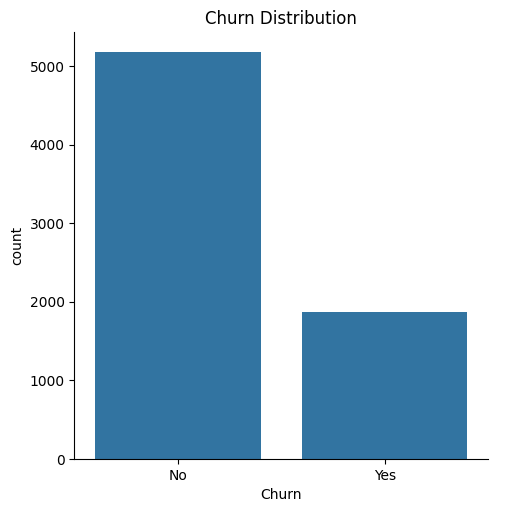

In [38]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Churn', data=df, kind='count')
plt.title('Churn Distribution') 
plt.show()

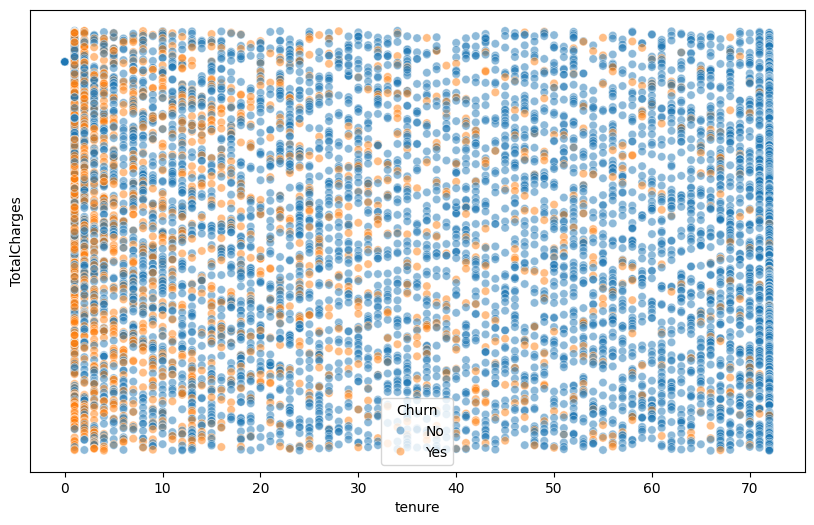

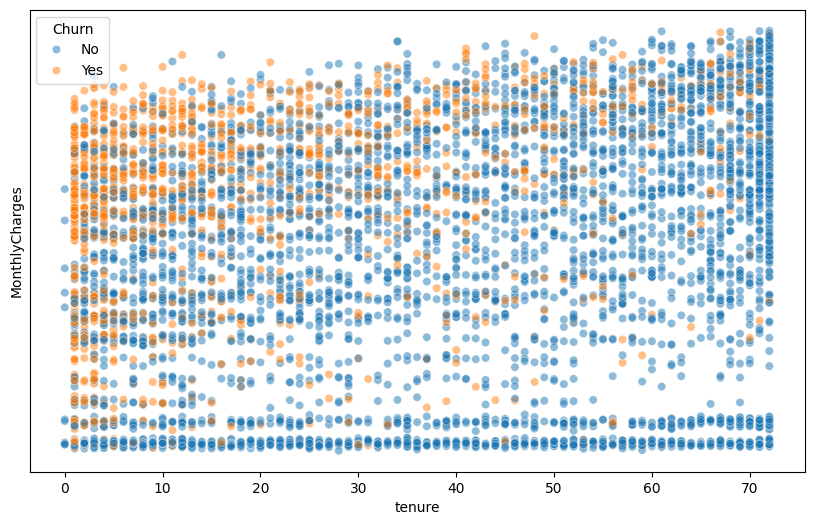

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges',hue='Churn', data=df, alpha=0.5)
plt.yticks([]) 
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges',hue='Churn', data=df, alpha=0.5)
plt.yticks([]) 
plt.show()

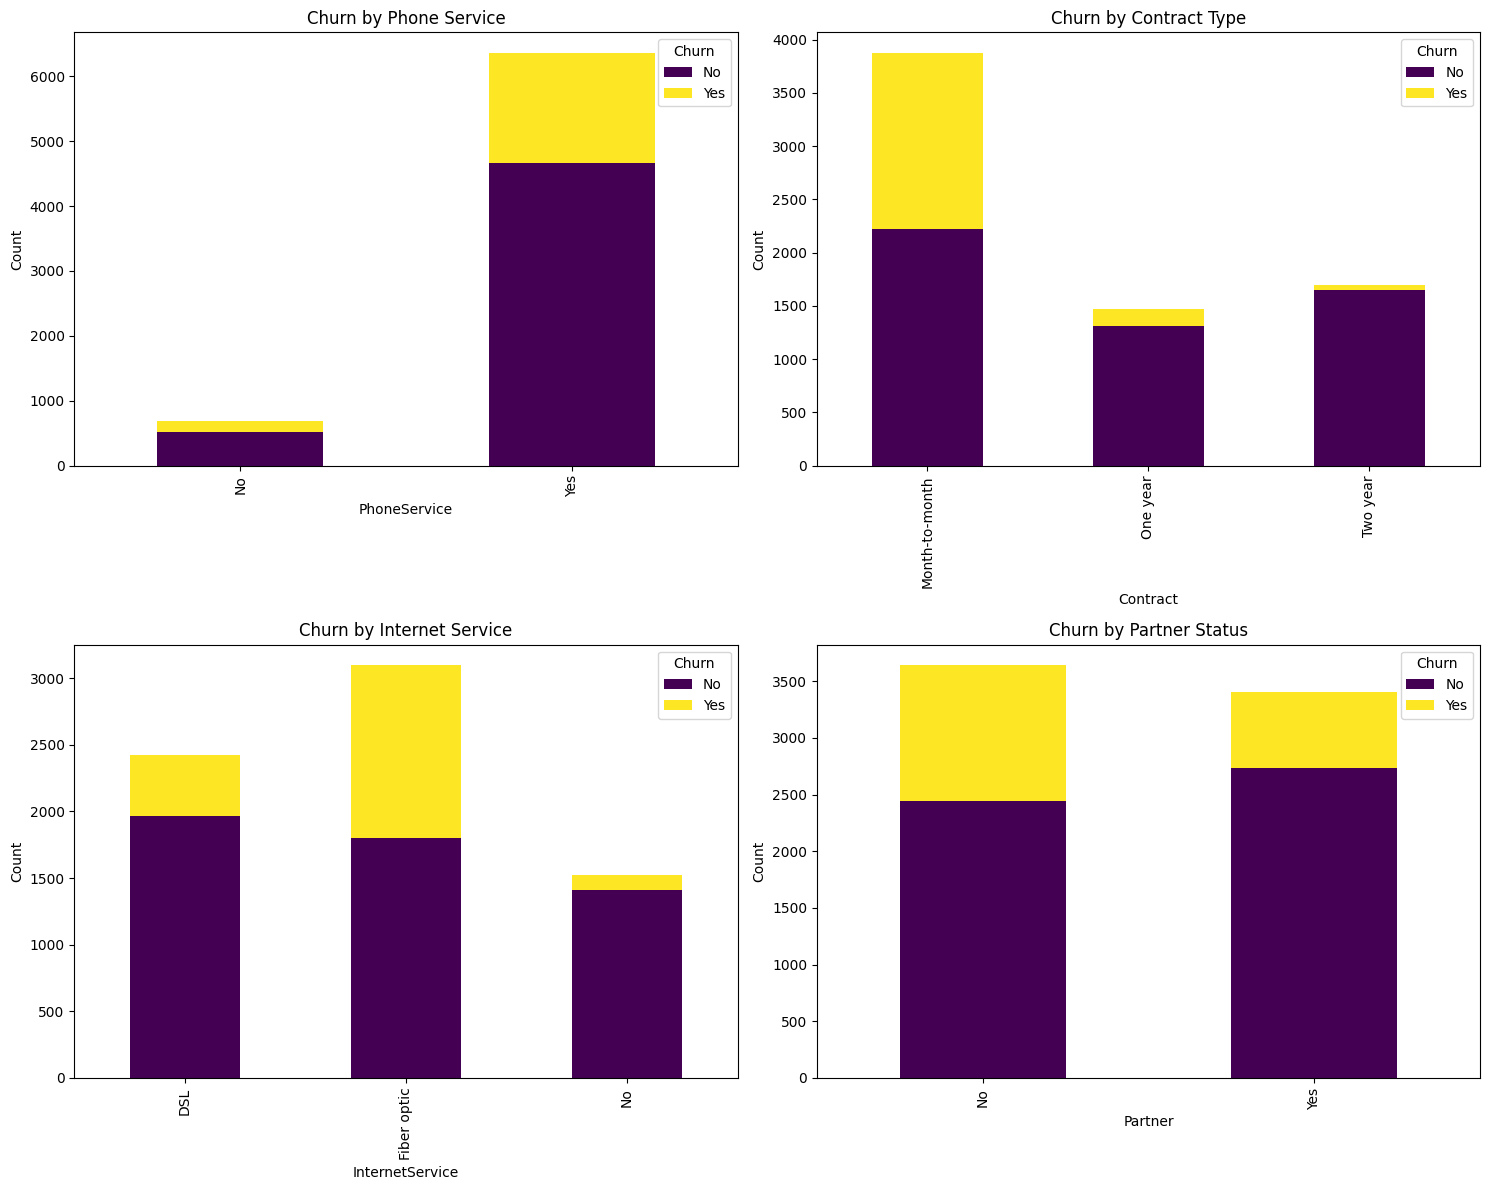

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Function to create stacked bar plots
def plot_stacked_bars(ax, feature, title):
    ct = pd.crosstab(df[feature], df['Churn'])
    ct.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.legend(title='Churn')


plot_stacked_bars(axes[0, 0], 'PhoneService', 'Churn by Phone Service')
plot_stacked_bars(axes[0, 1], 'Contract', 'Churn by Contract Type')
plot_stacked_bars(axes[1, 0], 'InternetService', 'Churn by Internet Service')
plot_stacked_bars(axes[1, 1], 'Partner', 'Churn by Partner Status')

plt.tight_layout()
plt.show()

Churn rarely occurs for long time plans, while it's nearly half of cases for monthly plans. This is a common pattern in subscription-based businesses, where customers are more likely to cancel their subscriptions if they are on a monthly plan compared to an annual plan. 

Monthly plans often have lower upfront costs, making it easier for customers to try out the service, but they also have the potential for higher churn rates as customers can cancel at any time without a long-term commitment. In contrast, annual plans typically require a larger upfront payment, which can lead to lower churn rates as customers are more invested in the service for a longer period of time.

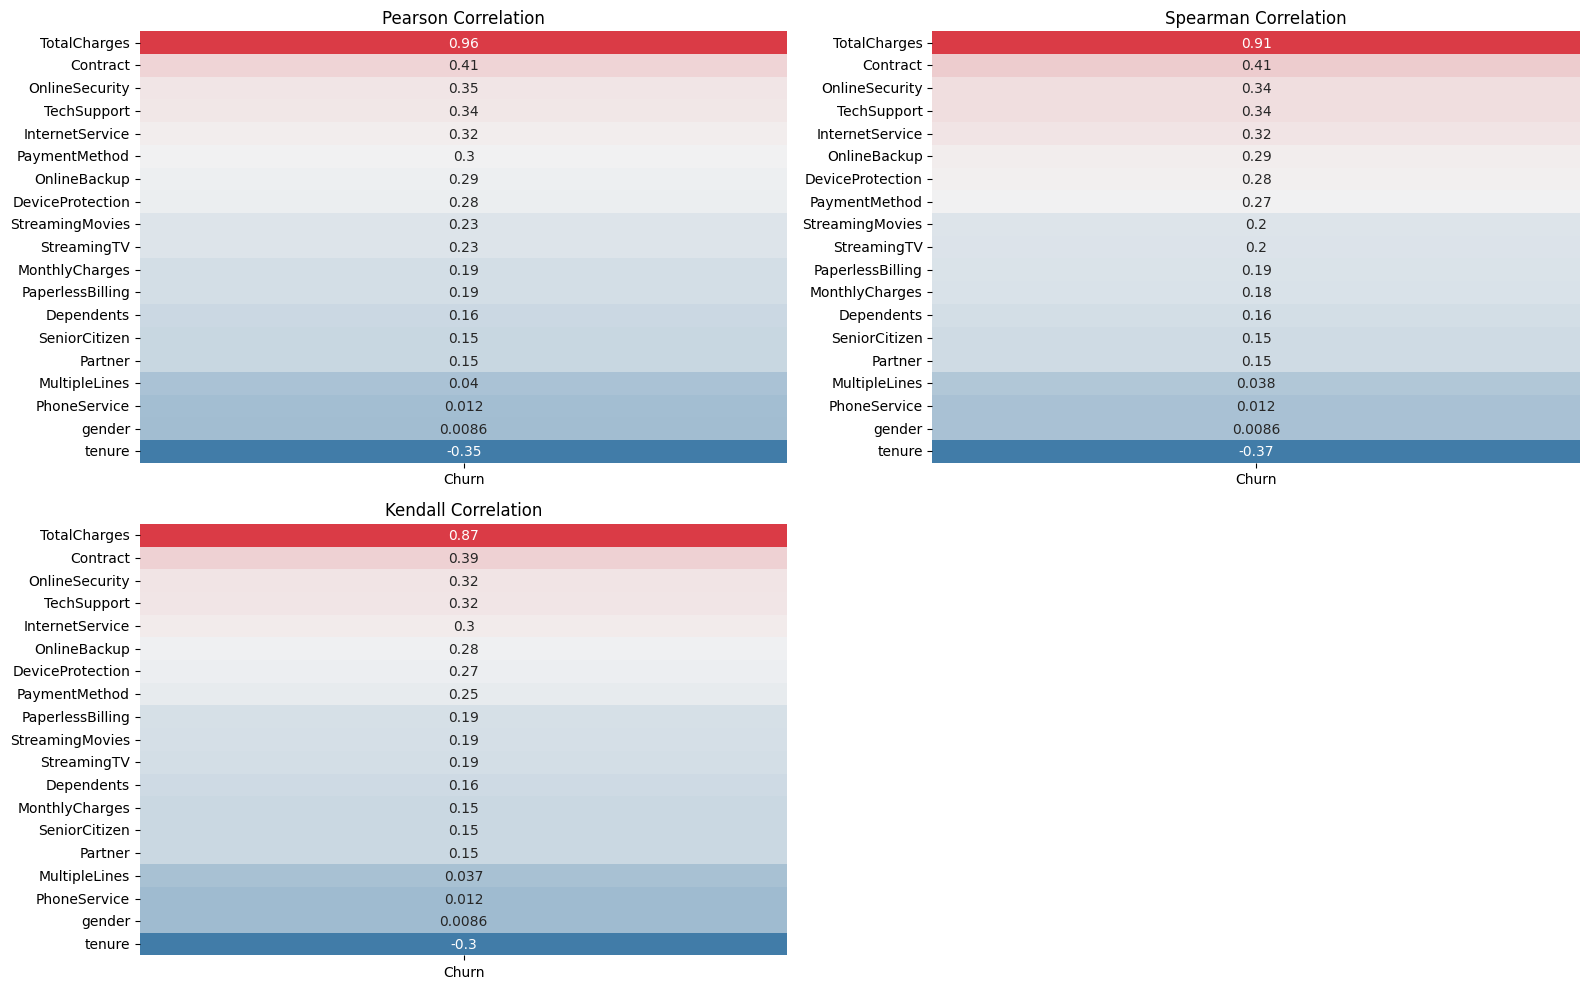

In [41]:
from category_encoders import TargetEncoder

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
te = TargetEncoder(cols=cat_cols)
df[cat_cols] = te.fit_transform(df[cat_cols], df['Churn'])


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

methods = ['pearson', 'spearman', 'kendall']
titles = ['Pearson Correlation', 'Spearman Correlation', 'Kendall Correlation']

for ax, method, title in zip(axes[:3], methods, titles):
    corr_Churn = df.corr(method=method)['Churn'] \
                   .sort_values(ascending=False) \
                   .to_frame()[1:]
    camp = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr_Churn, annot=True, cmap=camp, cbar=False, ax=ax)
    ax.set_title(title)

axes[-1].axis('off')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

scaler = StandardScaler()

col2scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in col2scale:
    df[col] = scaler.fit_transform(df[[col]])






l1 = [x for x in df.columns if x not in ['Churn', 'MultipleLines']]


sdf1 = df[l1]

train_x, test_x, train_y , test_y =  train_test_split(sdf1, df['Churn'], test_size=0.2, random_state=42,stratify=df['Churn'])



================================== SVM ==================================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.98      0.97      0.97       374

    accuracy                           0.99      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.99      0.99      0.99      1409



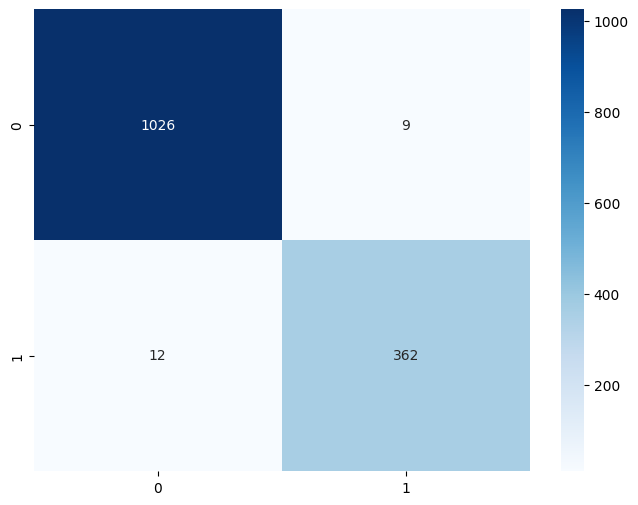

================================== Random Forest ==================================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.97      0.96      0.96       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409

================================== XGBoost ==================================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1035
           1       0.97      0.96      0.96       374

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.98      1409
weighted avg       0.98      0.98      0.98      1409



c:\Users\ABDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


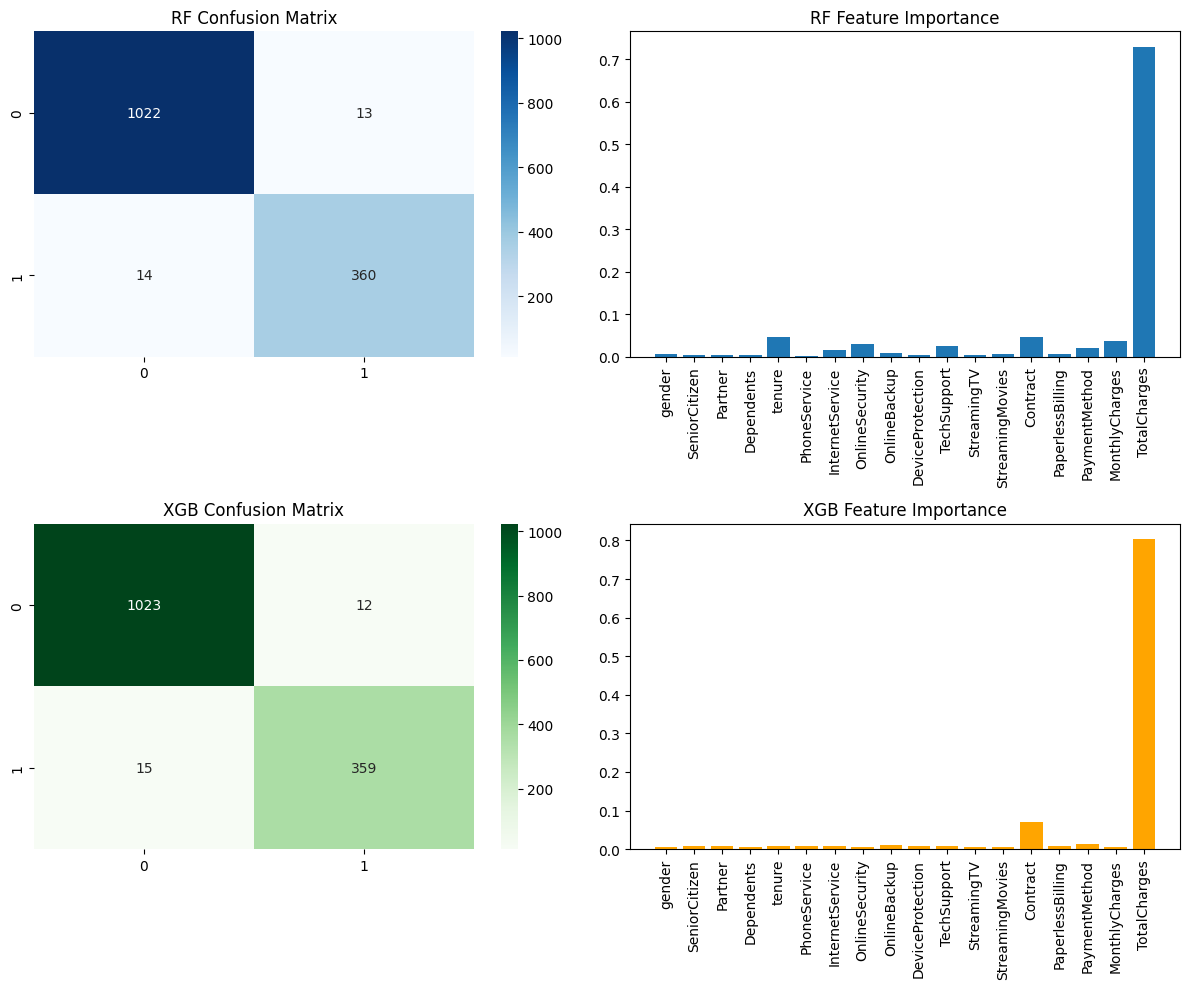

In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

svm = SVC()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

svm.fit(train_x, train_y)
rf.fit(train_x, train_y)

y_pred_svm = svm.predict(test_x)
y_pred_rf = rf.predict(test_x)

print('================================== SVM ==================================')
print(classification_report(test_y, y_pred_svm))
cm = confusion_matrix(test_y, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print('================================== Random Forest ==================================')
print(classification_report(test_y, y_pred_rf))
cm_rf = confusion_matrix(test_y, y_pred_rf)


print('================================== XGBoost ==================================')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(train_x, train_y)
y_pred_xgb = xgb.predict(test_x)

print(classification_report(test_y, y_pred_xgb))
cm_xgb = confusion_matrix(test_y, y_pred_xgb)




fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# RF Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('RF Confusion Matrix')

# RF Feature Importance
importances_rf = rf.feature_importances_
axes[1].bar(range(len(importances_rf)), importances_rf, tick_label=l1)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('RF Feature Importance')

# XGB Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('XGB Confusion Matrix')

# XGB Feature Importance
importances_xgb = xgb.feature_importances_
axes[3].bar(range(len(importances_xgb)), importances_xgb, color='orange', tick_label=l1)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_title('XGB Feature Importance')

plt.tight_layout()
plt.show()